##Installing Libiaries Needed##

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tensorflow
!pip install opencv-python
!pip install seaborn
!pip install pillow
!pip install tensorflow
!pip install opencv-python
!pip install seaborn
!pip install pillow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import seaborn as sns
from PIL import Image
import os
import shutil
import zipfile
import random

print("All libraries imported successfully!")

All libraries imported successfully!


##Data Processing##

In [ ]:
test_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\test_zip\test'

train_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\train_zip\train'

In [ ]:
# Run it once for making directories
# The exist_ok=True argument tells os.makedirs to not raise an exception if the directory already exists
os.makedirs(r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data', exist_ok=True)
os.makedirs(r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images', exist_ok=True)
os.makedirs(r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels', exist_ok=True)
os.makedirs(r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train', exist_ok=True)
os.makedirs(r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\val', exist_ok=True)
os.makedirs(r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train', exist_ok=True)
os.makedirs(r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val', exist_ok=True)

print("Directories created successfully!")

Directories created successfully!


In [ ]:
# Set the paths to labels and images directory
label_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels'
image_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Datasets\DRONE DATA\Final_data\images'

In [ ]:
# Paths to training and test directories from the main dataset
train_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\train_zip\train'
test_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\test_zip\test'

# Paths to organize the data into final directory structure (You already created these directories)
final_data_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data'
train_image_dir = os.path.join(final_data_dir, 'images/train')
val_image_dir = os.path.join(final_data_dir, 'images/val')
train_label_dir = os.path.join(final_data_dir, 'labels/train')
val_label_dir = os.path.join(final_data_dir, 'labels/val')

# Create directory structure if not already created
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

print("Directory structure for training and validation created successfully!")

Directory structure for training and validation created successfully!


In [ ]:
# Base data path
base_data_path = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Database1'
# Personal images directory
personal_images_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\MyDrive/IAT360SelfAnnotated/images'

###Copy Process###

In [ ]:
# Step 1: Copy images and labels from the database directory
for filename in os.listdir(base_data_path):
    if filename.endswith('.JPEG'):
        # Copy image
        src_image_path = os.path.join(base_data_path, filename)
        dst_image_path = os.path.join(train_image_dir, filename)
        shutil.copy(src_image_path, dst_image_path)

        # Copy the corresponding label file
        label_filename = filename.rsplit('.', 1)[0] + '.txt'
        src_label_path = os.path.join(base_data_path, label_filename)
        dst_label_path = os.path.join(train_label_dir, label_filename)

        if os.path.exists(src_label_path):
            shutil.copy(src_label_path, dst_label_path)

print("Images and labels copied successfully!")

Images and labels copied successfully!


In [ ]:
# Updated path for the base data directory
base_data_path = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Database1'

# Count the number of JPEG files in the specified folder
jpeg_files = [file for file in os.listdir(base_data_path) if file.lower().endswith(('.jpeg', '.jpg'))]
jpeg_count = len(jpeg_files)

print(f"Number of JPEG files: {jpeg_count}")

Number of JPEG files: 4014


In [ ]:
personal_images_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\IAT360SelfAnnotated\images'
personal_labels_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\IAT360SelfAnnotated\labels'

In [ ]:
# Step 1: Copy images and labels from the respective directories
for filename in os.listdir(personal_images_dir):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):  # Include all common image formats
        # Copy image
        src_image_path = os.path.join(personal_images_dir, filename)
        dst_image_path = os.path.join(val_image_dir, filename)
        shutil.copy(src_image_path, dst_image_path)

        # Copy the corresponding label file
        label_filename = filename.rsplit('.', 1)[0] + '.txt'
        src_label_path = os.path.join(personal_labels_dir, label_filename)
        dst_label_path = os.path.join(val_label_dir, label_filename)

        if os.path.exists(src_label_path):
            shutil.copy(src_label_path, dst_label_path)

Copy 30 of my annotated images for validation folders

In [ ]:

# List all JPEG files in the personal images directory
jpeg_files = [file for file in os.listdir(personal_images_dir) if file.lower().endswith(('.jpeg', '.jpg'))]
jpeg_count = len(jpeg_files)

# Print the number of JPEG files found
print(f"Number of jpg files: {jpeg_count}")

Number of jpg files: 30


Checking the amount of images matches

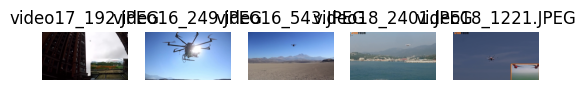

In [ ]:
# Number of images to preview
num_samples = 5

# Get a list of JPEG images in the destination directory
image_files = [f for f in os.listdir(train_image_dir) if f.lower().endswith(('.jpeg', '.jpg'))]

# Select a random sample of images
sample_files = random.sample(image_files, min(num_samples, len(image_files)))

# Display the selected images
for i, image_file in enumerate(sample_files):
    img_path = os.path.join(train_image_dir, image_file)
    img = Image.open(img_path)

    # Plotting each image
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(image_file)

plt.show()

Print and show 5 images from the large dataset

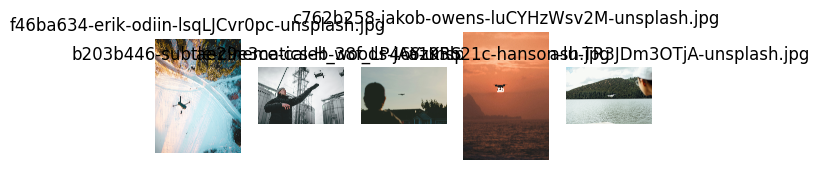

In [ ]:
# Number of images to preview
num_samples = 5

# Get a list of JPEG images in the destination directory
image_files = [f for f in os.listdir(val_image_dir) if f.lower().endswith(('.jpeg', '.jpg'))]

# Select a random sample of images
sample_files = random.sample(image_files, min(num_samples, len(image_files)))

# Display the selected images
for i, image_file in enumerate(sample_files):
    img_path = os.path.join(val_image_dir, image_file)
    img = Image.open(img_path)

    # Plotting each image
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(image_file)

plt.show()

Define the lables for large dataset

In [ ]:
# Initialize the DataFrame
df = {
    'name': [],
    'label': [],
    'width': [],
    'height': [],
    'xmin': [],
    'ymin': [],
    'xmax': [],
    'ymax': []
}

# YOLO format label directory
train_label_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train'
image_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train'  # Add your image directory

# Iterate through each YOLO text file
for label_file in os.listdir(train_label_dir):
    if label_file.endswith('.txt') and label_file != 'classes.txt':
        label_path = os.path.join(train_label_dir, label_file)
        image_name = label_file.rsplit('.', 1)[0]  # Get image name without extension

        # Construct the image path to get dimensions
        image_path = os.path.join(image_dir, image_name + ".JPEG")  # Adjust the extension as necessary

        # Load the image to get its dimensions
        if os.path.exists(image_path):
            image = cv2.imread(image_path)
            if image is not None:
                img_height, img_width = image.shape[:2]
            else:
                print(f"Error loading image: {image_path}")
                continue
        else:
            print(f"Image file not found: {image_path}")
            continue

        # Open and read the YOLO label file
        with open(label_path, 'r') as file:
            for line in file:
                data = line.strip().split()
                if len(data) < 5:
                    print(f"Invalid data line in {label_file}: {line.strip()}")
                    continue  # Skip invalid lines

                # YOLO format: class, x_center, y_center, width, height (normalized)
                class_id = int(data[0])  # Assuming this is always valid
                x_center = float(data[1])
                y_center = float(data[2])
                bbox_width = float(data[3])
                bbox_height = float(data[4])

                # Convert normalized YOLO format to absolute coordinates
                xmin = int((x_center - bbox_width / 2) * img_width)
                ymin = int((y_center - bbox_height / 2) * img_height)
                xmax = int((x_center + bbox_width / 2) * img_width)
                ymax = int((y_center + bbox_height / 2) * img_height)

                # Append to DataFrame
                df['name'].append(image_name)
                df['label'].append('drone')  # Class name for class_id 0
                df['width'].append(img_width)
                df['height'].append(img_height)
                df['xmin'].append(xmin)
                df['ymin'].append(ymin)
                df['xmax'].append(xmax)
                df['ymax'].append(ymax)

# Convert dictionary to DataFrame
df = pd.DataFrame(df)

# Display or save the DataFrame
print("DataFrame Preview:")
print(df.head())

# Check for any empty or missing values
missing_values = df.isnull().sum()

# Display the missing values
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values

Error loading image: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video17_295.JPEG
Error loading image: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video19_1900.JPEG
DataFrame Preview:
   name  label  width  height  xmin  ymin  xmax  ymax
0  1000  drone    600     403   110   137   228   205
1  1006  drone    400     300   182    10   264    65
2  1010  drone    608     342   154   115   395   213
3   109  drone   1920    1090   137   196   478   436
4    11  drone    596     349   190   112   515   298

Missing Values in Each Column:
Series([], dtype: int64)


In [ ]:
from PIL import Image

# Attempt to load an example image
image_paths = [
    r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video17_295.JPEG',
    r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video19_1900.JPEG'
]

for image_path in image_paths:
    try:
        image = Image.open(image_path)
        image.show()  # Or perform any other processing you need
    except Exception as e:
        print(f"Error loading image: {image_path} - {e}")

Error loading image: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video17_295.JPEG - cannot identify image file 'C:\\Users\\PC\\Desktop\\IAT360ComputerVision\\Mydrive\\Datasets\\DRONE DATA\\Final_data\\images\\train\\video17_295.JPEG'
Error loading image: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video19_1900.JPEG - cannot identify image file 'C:\\Users\\PC\\Desktop\\IAT360ComputerVision\\Mydrive\\Datasets\\DRONE DATA\\Final_data\\images\\train\\video19_1900.JPEG'


Double check if the two images are unloadable and are corrupted

In [ ]:
import os

# Define paths
train_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train'
label_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train'

# List of corrupted image filenames (update with actual corrupted filenames)
corrupted_images = [
    'video17_295.JPEG',
    'video19_1900.JPEG'
]

# Loop through each corrupted image
for image_name in corrupted_images:
    # Construct full image path
    image_path = os.path.join(train_dir, image_name)

    # Construct corresponding text file path (assuming they have the same name)
    # Change the extension to .txt
    label_name = os.path.splitext(image_name)[0] + '.txt'  # Extract the base name and append .txt
    label_path = os.path.join(label_dir, label_name)

    # Delete the image file if it exists
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted image: {image_path}")
    else:
        print(f"Image not found: {image_path}")

    # Delete the corresponding label file if it exists
    if os.path.exists(label_path):
        os.remove(label_path)
        print(f"Deleted label: {label_path}")
    else:
        print(f"Label not found: {label_path}")

Deleted image: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video17_295.JPEG
Deleted label: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train\video17_295.txt
Deleted image: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video19_1900.JPEG
Deleted label: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train\video19_1900.txt


Delete both corrupted images and their corrsponding txt in the correct places

In [ ]:
print(df)

           name  label  width  height  xmin  ymin  xmax  ymax
0          1000  drone    600     403   110   137   228   205
1          1006  drone    400     300   182    10   264    65
2          1010  drone    608     342   154   115   395   213
3           109  drone   1920    1090   137   196   478   436
4            11  drone    596     349   190   112   515   298
...         ...    ...    ...     ...   ...   ...   ...   ...
3335  video9221  drone    752     480   116   169   136   180
3336  video9235  drone    752     480    97    28   125    51
3337    video93  drone    752     480   695    18   727    38
3338  video9463  drone    752     480    24   145    50   163
3339  video9464  drone    752     480   267   124   317   152

[3340 rows x 8 columns]


Get the first give in the table

In [ ]:

# Initialize the DataFrame
custom_df = {
    'name': [],
    'label': [],
    'width': [],
    'height': [],
    'xmin': [],
    'ymin': [],
    'xmax': [],
    'ymax': []
}

# Define your custom label and image directories
personal_images_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\IAT360SelfAnnotated\images'
personal_labels_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\IAT360SelfAnnotated\labels'

# Iterate through each YOLO text file in your custom label directory
for label_file in os.listdir(personal_labels_dir):
    if label_file.endswith('.txt') and label_file != 'classes.txt':
        label_path = os.path.join(personal_labels_dir, label_file)
        image_name = label_file.rsplit('.', 1)[0]  # Get image name without extension

        # Construct the image path to get dimensions
        image_path = os.path.join(personal_images_dir, image_name + ".jpg")  # Adjust the extension as necessary

        # Load the image to get its dimensions
        if os.path.exists(image_path):
            image = cv2.imread(image_path)
            if image is not None:
                img_height, img_width = image.shape[:2]
            else:
                print(f"Error loading image: {image_path}")
                continue
        else:
            print(f"Image file not found: {image_path}")
            continue

        # Open and read the YOLO label file
        with open(label_path, 'r') as file:
            for line in file:
                data = line.strip().split()
                if len(data) < 5:
                    print(f"Invalid data line in {label_file}: {line.strip()}")
                    continue  # Skip invalid lines

                # YOLO format: class, x_center, y_center, width, height (normalized)
                class_id = int(data[0])  # Adjust as needed for your custom class names
                x_center = float(data[1])
                y_center = float(data[2])
                bbox_width = float(data[3])
                bbox_height = float(data[4])

                # Convert normalized YOLO format to absolute coordinates
                xmin = int((x_center - bbox_width / 2) * img_width)
                ymin = int((y_center - bbox_height / 2) * img_height)
                xmax = int((x_center + bbox_width / 2) * img_width)
                ymax = int((y_center + bbox_height / 2) * img_height)

                # Append to DataFrame
                custom_df['name'].append(image_name)
                custom_df['label'].append('your_class_name')  # Change 'your_class_name' to match your custom labels
                custom_df['width'].append(img_width)
                custom_df['height'].append(img_height)
                custom_df['xmin'].append(xmin)
                custom_df['ymin'].append(ymin)
                custom_df['xmax'].append(xmax)
                custom_df['ymax'].append(ymax)

# Convert dictionary to DataFrame
custom_df = pd.DataFrame(custom_df)

# Display or save the DataFrame
print("Custom DataFrame Preview:")
print(custom_df.head())

# Check for any empty or missing values
missing_values_custom = custom_df.isnull().sum()

# Display the missing values
print("\nMissing Values in Each Column (Custom Dataset):")
print(missing_values_custom[missing_values_custom > 0])  # Only show columns with missing values

Custom DataFrame Preview:
                                            name            label  width  \
0    0faae194-nathan-dumlao-J1QkzNckrRQ-unsplash  your_class_name   5464   
1   1477cfe3-oskar-kadaksoo-hAe4zTSacNA-unsplash  your_class_name   3784   
2       22542812-dose-media-ramqoN2kiuo-unsplash  your_class_name   4687   
3   2708219c-david-henrichs-72AYEEBJpz4-unsplash  your_class_name   4240   
4  334909fa-jonathan-lampel-L9wrEGJjRdo-unsplash  your_class_name   2316   

   height  xmin  ymin  xmax  ymax  
0    8192  1222  3809  4761  5064  
1    2525  1794  1137  1984  1247  
2    3060  1232  1087  4535  2287  
3    2832   437   849  3621  1589  
4    2316    76   217  2251  1771  

Missing Values in Each Column (Custom Dataset):
Series([], dtype: int64)


Define the lables for my 30 dataset

In [ ]:
print(custom_df)

                                               name            label  width  \
0       0faae194-nathan-dumlao-J1QkzNckrRQ-unsplash  your_class_name   5464   
1      1477cfe3-oskar-kadaksoo-hAe4zTSacNA-unsplash  your_class_name   3784   
2          22542812-dose-media-ramqoN2kiuo-unsplash  your_class_name   4687   
3      2708219c-david-henrichs-72AYEEBJpz4-unsplash  your_class_name   4240   
4     334909fa-jonathan-lampel-L9wrEGJjRdo-unsplash  your_class_name   2316   
5      3350e18d-anita-denunzio-ysIBWnRzmgI-unsplash  your_class_name   4608   
6        4dea9c52-nicolas-luna-pMFNnnODrKA-unsplash  your_class_name   6000   
7        533aff26-zoshua-colah-T8nGldduE9g-unsplash  your_class_name   8160   
8       549739cc-kenny-eliason-CeHGoFLzvNU-unsplash  your_class_name   4896   
9       5cb95609-joshua-fuller-u1EGfuB4llU-unsplash  your_class_name   3880   
10                                   5cbaa159-drone  your_class_name    500   
11     5cfe3545-anita-denunzio-nqNqkiKQeGM-unsplash 

In [ ]:
print(df.head())

   name  label  width  height  xmin  ymin  xmax  ymax
0  1000  drone    600     403   110   137   228   205
1  1006  drone    400     300   182    10   264    65
2  1010  drone    608     342   154   115   395   213
3   109  drone   1920    1090   137   196   478   436
4    11  drone    596     349   190   112   515   298


Image dimensions - Width: 600, Height: 403
Original Bounding Box - xmin: 110, ymin: 137, xmax: 228, ymax: 205
Adjusted Bounding Box - xmin: 110, ymin: 137, xmax: 228, ymax: 205


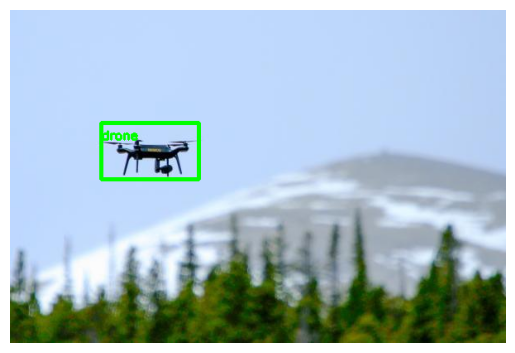

In [ ]:
image_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train'
# Select the index of the image you want to visualize
index = 0  # Change this index as needed

# Construct the full path to the image
image_path = os.path.join(image_dir, df["name"][index] + ".JPEG")

# Check if the image exists
if not os.path.exists(image_path):
    print(f"Error: Image does not exist at path: {image_path}")
else:
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error loading image: {image_path}")
    else:
        # Get image dimensions
        height, width = image.shape[:2]
        print(f"Image dimensions - Width: {width}, Height: {height}")

        # Get bounding box coordinates directly from the DataFrame
        xmin = df['xmin'][index]
        ymin = df['ymin'][index]
        xmax = df['xmax'][index]
        ymax = df['ymax'][index]

        # Print the original bounding box values for debugging
        print(f"Original Bounding Box - xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")

        # If bounding box values are normalized, scale them to image dimensions
        if df['xmin'][index] <= 1.0 and df['xmax'][index] <= 1.0 and df['ymin'][index] <= 1.0 and df['ymax'][index] <= 1.0:
            xmin = int(xmin * width)
            ymin = int(ymin * height)
            xmax = int(xmax * width)
            ymax = int(ymax * height)

        # Ensure coordinates are within image dimensions
        xmin = max(0, min(xmin, width - 1))
        ymin = max(0, min(ymin, height - 1))
        xmax = max(0, min(xmax, width - 1))
        ymax = max(0, min(ymax, height - 1))

        # Print adjusted bounding box values for debugging
        print(f"Adjusted Bounding Box - xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")

        # Draw rectangle around the bounding box
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)  # Green color, thickness 3

        # Put label (class_id) near the bounding box
        label = df["label"][index]
        cv2.putText(image, str(label), (xmin, ymin + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Green color

        # Convert BGR to RGB for correct color display in matplotlib
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(image)
        plt.axis('off')  # Turn off axis
        plt.show()

Image dimensions - Width: 1280, Height: 720
Original Bounding Box - xmin: 703, ymin: 167, xmax: 968, ymax: 363
Adjusted Bounding Box - xmin: 703, ymin: 167, xmax: 968, ymax: 363


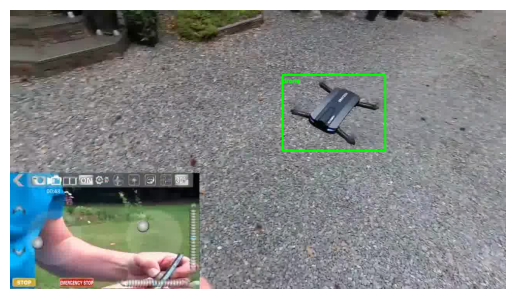

In [ ]:
image_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train'
# Select the index of the image you want to visualize
index = 3099  # Change this index as needed

# Construct the full path to the image
image_path = os.path.join(image_dir, df["name"][index] + ".JPEG")

# Check if the image exists
if not os.path.exists(image_path):
    print(f"Error: Image does not exist at path: {image_path}")
else:
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error loading image: {image_path}")
    else:
        # Get image dimensions
        height, width = image.shape[:2]
        print(f"Image dimensions - Width: {width}, Height: {height}")

        # Get bounding box coordinates directly from the DataFrame
        xmin = df['xmin'][index]
        ymin = df['ymin'][index]
        xmax = df['xmax'][index]
        ymax = df['ymax'][index]

        # Print the original bounding box values for debugging
        print(f"Original Bounding Box - xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")

        # If bounding box values are normalized, scale them to image dimensions
        if df['xmin'][index] <= 1.0 and df['xmax'][index] <= 1.0 and df['ymin'][index] <= 1.0 and df['ymax'][index] <= 1.0:
            xmin = int(xmin * width)
            ymin = int(ymin * height)
            xmax = int(xmax * width)
            ymax = int(ymax * height)

        # Ensure coordinates are within image dimensions
        xmin = max(0, min(xmin, width - 1))
        ymin = max(0, min(ymin, height - 1))
        xmax = max(0, min(xmax, width - 1))
        ymax = max(0, min(ymax, height - 1))

        # Print adjusted bounding box values for debugging
        print(f"Adjusted Bounding Box - xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")

        # Draw rectangle around the bounding box
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)  # Green color, thickness 3

        # Put label (class_id) near the bounding box
        label = df["label"][index]
        cv2.putText(image, str(label), (xmin, ymin + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Green color

        # Convert BGR to RGB for correct color display in matplotlib
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(image)
        plt.axis('off')  # Turn off axis
        plt.show()

Image dimensions - Width: 3784, Height: 2525
Original Bounding Box - xmin: 1794, ymin: 1137, xmax: 1984, ymax: 1247
Adjusted Bounding Box - xmin: 1794, ymin: 1137, xmax: 1984, ymax: 1247


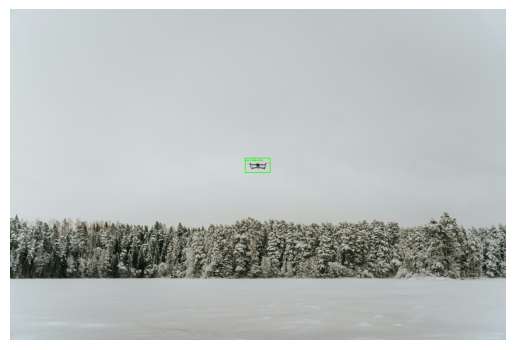

In [ ]:
# Define the directory for validation images
image_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\val'

# Select the index of the image you want to visualize
index = 1  # You can change this index to view a different image

# Construct the full path to the image
image_filename = custom_df["name"][index] + ".jpg"  # Make sure the extension matches your file
image_path = os.path.join(image_dir, image_filename)

# Check if the image exists
if not os.path.exists(image_path):
    print(f"Error: Image does not exist at path: {image_path}")
else:
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error loading image: {image_path}")
    else:
        # Get image dimensions
        height, width = image.shape[:2]
        print(f"Image dimensions - Width: {width}, Height: {height}")

        # Get bounding box coordinates directly from the DataFrame
        xmin = custom_df['xmin'][index]
        ymin = custom_df['ymin'][index]
        xmax = custom_df['xmax'][index]
        ymax = custom_df['ymax'][index]

        # Print the original bounding box values for debugging
        print(f"Original Bounding Box - xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")

        # If bounding box values are normalized, scale them to image dimensions
        if 0.0 <= xmin <= 1.0 and 0.0 <= xmax <= 1.0 and 0.0 <= ymin <= 1.0 and 0.0 <= ymax <= 1.0:
            xmin = int(xmin * width)
            ymin = int(ymin * height)
            xmax = int(xmax * width)
            ymax = int(ymax * height)

        # Ensure coordinates are within image dimensions
        xmin = max(0, min(xmin, width - 1))
        ymin = max(0, min(ymin, height - 1))
        xmax = max(0, min(xmax, width - 1))
        ymax = max(0, min(ymax, height - 1))

        # Print adjusted bounding box values for debugging
        print(f"Adjusted Bounding Box - xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")

        # Draw rectangle around the bounding box
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)  # Green color, thickness 3

        # Put label (class_id) near the bounding box
        label = custom_df["label"][index]
        cv2.putText(image, str(label), (xmin, ymin + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Green color

        # Convert BGR to RGB for correct color display in matplotlib
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(image)
        plt.axis('off')  # Turn off axis
        plt.show()

Image dimensions - Width: 5149, Height: 3433
Original Bounding Box - xmin: 721, ymin: 1038, xmax: 3165, ymax: 2426
Adjusted Bounding Box - xmin: 721, ymin: 1038, xmax: 3165, ymax: 2426


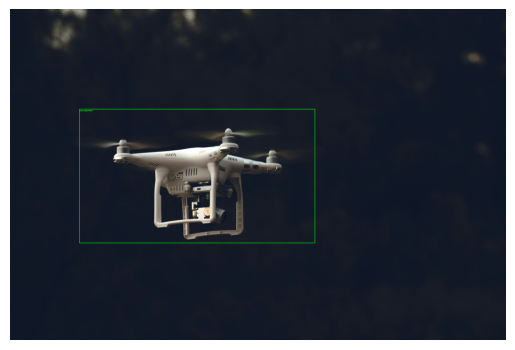

In [ ]:
# Define the directory for validation images
image_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\val'

# Select the index of the image you want to visualize
index = 29  # You can change this index to view a different image

# Construct the full path to the image
image_filename = custom_df["name"][index] + ".jpg"  # Make sure the extension matches your file
image_path = os.path.join(image_dir, image_filename)

# Check if the image exists
if not os.path.exists(image_path):
    print(f"Error: Image does not exist at path: {image_path}")
else:
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was loaded successfully
    if image is None:
        print(f"Error loading image: {image_path}")
    else:
        # Get image dimensions
        height, width = image.shape[:2]
        print(f"Image dimensions - Width: {width}, Height: {height}")

        # Get bounding box coordinates directly from the DataFrame
        xmin = custom_df['xmin'][index]
        ymin = custom_df['ymin'][index]
        xmax = custom_df['xmax'][index]
        ymax = custom_df['ymax'][index]

        # Print the original bounding box values for debugging
        print(f"Original Bounding Box - xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")

        # If bounding box values are normalized, scale them to image dimensions
        if 0.0 <= xmin <= 1.0 and 0.0 <= xmax <= 1.0 and 0.0 <= ymin <= 1.0 and 0.0 <= ymax <= 1.0:
            xmin = int(xmin * width)
            ymin = int(ymin * height)
            xmax = int(xmax * width)
            ymax = int(ymax * height)

        # Ensure coordinates are within image dimensions
        xmin = max(0, min(xmin, width - 1))
        ymin = max(0, min(ymin, height - 1))
        xmax = max(0, min(xmax, width - 1))
        ymax = max(0, min(ymax, height - 1))

        # Print adjusted bounding box values for debugging
        print(f"Adjusted Bounding Box - xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax}")

        # Draw rectangle around the bounding box
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 3)  # Green color, thickness 3

        # Put label (class_id) near the bounding box
        label = custom_df["label"][index]
        cv2.putText(image, str(label), (xmin, ymin + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)  # Green color

        # Convert BGR to RGB for correct color display in matplotlib
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.imshow(image)
        plt.axis('off')  # Turn off axis
        plt.show()

##MODEL TRANNING AND REFINEMENT

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
Setup complete  (48 CPUs, 127.9 GB RAM, 231.1/237.7 GB disk)


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolo11s.pt') # pretrained model

In [ ]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_runnin

In [ ]:
%%writefile "C:\\Users\\PC\\Desktop\\IAT360ComputerVision\\config.yaml"
path: C:\Users\PC\Desktop\IAT360ComputerVision\Datasets\DRONE DATA\Final_data
train: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train
val: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\val

# Classes
nc: 1  # replace based on your dataset's number of classes

# Class names
names:
  0: Drone

Writing C:\\Users\\PC\\Desktop\\IAT360ComputerVision\\config.yaml


In [ ]:
%%writefile "C:\\Users\\PC\\Desktop\\IAT360ComputerVision\\config.yaml"
path: C:\Users\PC\Desktop\IAT360ComputerVision\Datasets\DRONE DATA\Final_data
train: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train
val: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\val

# Classes
nc: 1  # replace based on your dataset's number of classes

# Class names
names:
  0: Drone
augment:
  file: C:\Users\PC\Desktop\IAT360ComputerVision\augmentation.yaml  # Add path to your augmentation settings file

Overwriting C:\\Users\\PC\\Desktop\\IAT360ComputerVision\\config.yaml


In [ ]:
%%writefile "C:\\Users\\PC\\Desktop\\IAT360ComputerVision\\augmentation.yaml"
hsv_h: 0.015           # Adjusts hue
hsv_s: 0.7             # Adjusts saturation
hsv_v: 0.4             # Adjusts brightness
degrees: 0.0           # Rotation angle
translate: 0.1         # Translation factor
scale: 0.5             # Scaling factor
shear: 0.0             # Shear angle
perspective: 0.0       # Perspective transformation
flipud: 0.0            # Flip upside down
fliplr: 0.5            # Flip left-right
mosaic: 1.0            # Mosaic augmentation (1.0 means enabled)
mixup: 0.0             # Mixup augmentation (disabled here)
erasing: 0.4           # Random erasing (chance of applying random erasing)

Overwriting C:\\Users\\PC\\Desktop\\IAT360ComputerVision\\augmentation.yaml


In [ ]:
!nvidia-smi

Wed Nov  6 11:20:46 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050      WDDM  |   00000000:03:00.0  On |                  N/A |
|  0%   39C    P8             15W /  130W |    1374MiB /   8192MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch

def check_gpu():
    if torch.cuda.is_available():
        device = torch.device('cuda')
        print(f"Using GPU: {torch.cuda.get_device_name(device)}")
        print(f"Current GPU memory usage:")
        print(f"Allocated: {torch.cuda.memory_allocated(device) / (1024 ** 2):.2f} MB")
        print(f"Cached: {torch.cuda.memory_reserved(device) / (1024 ** 2):.2f} MB")
    else:
        print("GPU is not available. Using CPU.")

# Run the check
check_gpu()

Using GPU: NVIDIA GeForce RTX 3050
Current GPU memory usage:
Allocated: 0.00 MB
Cached: 0.00 MB


In [ ]:
model.train(data=r"C:\Users\PC\Desktop\IAT360ComputerVision\config.yaml",epochs=5,patience=5,batch=8, lr0=0.0005,imgsz=640,workers=12) # Changed the data path to the yaml file

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:\Users\PC\Desktop\IAT360ComputerVision\config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=12, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

100%|█████████████████████████████████████████████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 8.58MB/s]


AMP: checks passed 


train: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train... 4008 im

train: WARNING  C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video15_487.JPEG: ignoring corrupt image/label: image file is truncated (5 bytes not processed)


train: New cache created: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train.cache


val: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val... 30 images, 

val: New cache created: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to runs\detect\train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5       2.4G      1.832      2.557      1.416          1        640: 100%|██████████| 502/502 [02:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.339        0.5      0.334      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.35G      1.782      1.318      1.459          1        640: 100%|██████████| 502/502 [02:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.531      0.528      0.447      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.37G      1.744      1.212      1.421          1        640: 100%|██████████| 502/502 [02:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.474        0.5      0.444      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.37G       1.66      1.097      1.375          1        640: 100%|██████████| 502/502 [02:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.794      0.433      0.575      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.37G       1.59      1.008      1.319          0        640: 100%|██████████| 502/502 [02:09<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.757      0.624      0.617      0.231



5 epochs completed in 0.191 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 19.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0


                   all         30         30      0.757      0.622      0.617      0.231
Speed: 0.4ms preprocess, 8.9ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001195AFCF5F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val.cache... 30 im
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<0


                   all         30         30       0.75      0.633      0.617      0.231
Speed: 8.7ms preprocess, 25.1ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs\detect\train2


0.6333333333333333

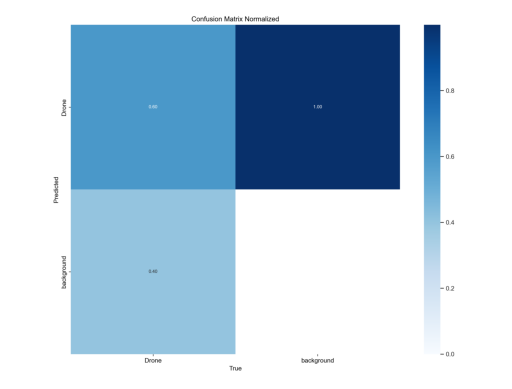

In [ ]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

# Open the image using the updated path
image_path = r'C:\Users\PC\Desktop\IAT360A1\runs\detect\train2\confusion_matrix_normalized.png'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

Default trainning to get a feel on how well it can do with small batch size

For some reason one of the images is not loaded so I will remove it from the training batch

In [ ]:
from PIL import Image

# Attempt to load an example image
image_paths = [
    r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video15_487.JPEG'

]

for image_path in image_paths:
    try:
        image = Image.open(image_path)
        image.show()  # Or perform any other processing you need
    except Exception as e:
        print(f"Error loading image: {image_path} - {e}")

Error loading image: C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video15_487.JPEG - image file is truncated (5 bytes not processed)


In [ ]:
import os

# Define paths
train_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train'
label_dir = r'C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train'

# List of corrupted image filenames (update with actual corrupted filenames)
corrupted_images = [
    'video15_487.JPEG'

]

# Loop through each corrupted image
for image_name in corrupted_images:
    # Construct full image path
    image_path = os.path.join(train_dir, image_name)

    # Construct corresponding text file path (assuming they have the same name)
    # Change the extension to .txt
    label_name = os.path.splitext(image_name)[0] + '.txt'  # Extract the base name and append .txt
    label_path = os.path.join(label_dir, label_name)

    # Delete the image file if it exists
    if os.path.exists(image_path):
        os.remove(image_path)
        print(f"Deleted image: {image_path}")
    else:
        print(f"Image not found: {image_path}")

    # Delete the corresponding label file if it exists
    if os.path.exists(label_path):
        os.remove(label_path)
        print(f"Deleted label: {label_path}")
    else:
        print(f"Label not found: {label_path}")

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\PC\\Desktop\\IAT360ComputerVision\\Mydrive\\Datasets\\DRONE DATA\\Final_data\\images\\train\\video15_487.JPEG'

Welp not sure whats going on here cant deleate

In [ ]:
model.train(data=r"C:\Users\PC\Desktop\IAT360A1\config.yaml", epochs=50, patience=5, batch=10, lr0=0.0001, imgsz=640,augment=True,workers=12) # Changed the data path to the yaml file

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:\Users\PC\Desktop\IAT360A1\config.yaml, epochs=50, time=None, patience=5, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=12, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

train: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train.cache... 4

train: WARNING  C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video15_487.JPEG: ignoring corrupt image/label: image file is truncated (5 bytes not processed)



val: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val.cache... 30 im


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to runs\detect\train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.86G      1.714      1.734      1.418          9        640: 100%|██████████| 401/401 [02:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.647      0.467      0.533      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.82G       1.64      1.128      1.345         14        640: 100%|██████████| 401/401 [01:52<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.721      0.533      0.548      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.81G      1.655      1.074      1.345          6        640: 100%|██████████| 401/401 [01:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.415        0.5       0.43      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.81G      1.627      1.044      1.338         17        640: 100%|██████████| 401/401 [01:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.624      0.433        0.5      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.81G      1.629      1.041      1.336         19        640: 100%|██████████| 401/401 [01:49<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.738      0.471      0.511      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.81G      1.595     0.9968      1.318         19        640: 100%|██████████| 401/401 [01:49<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.681      0.642       0.61       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.8G      1.601     0.9971      1.307         17        640: 100%|██████████| 401/401 [01:49<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<0

                   all         30         30      0.544        0.5      0.484      0.191


EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 2, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

7 epochs completed in 0.243 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 19.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<0


                   all         30         30      0.814      0.584      0.673      0.243
Speed: 0.4ms preprocess, 35.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs\detect\train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001195C341040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val.cache... 30 im
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<0


                   all         30         30      0.683      0.733      0.695       0.25
Speed: 1.7ms preprocess, 67.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs\detect\train32


0.7333333333333333

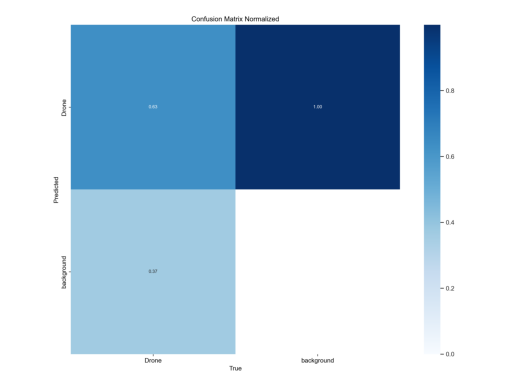

In [ ]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

# Open the image using the updated path
image_path = r'C:\Users\PC\Desktop\IAT360ComputerVision\runs\detect\train32\confusion_matrix_normalized.png'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
model.train(
    data=r"C:\Users\PC\Desktop\IAT360ComputerVision\config.yaml",  # Path to your dataset config
    epochs=50,                                         # Number of epochs
    patience=5,                                       # Patience for early stopping
    batch=30,                                         # Batch size
    lr0=0.0001,                                       # Initial learning rate
    imgsz=640,                                        # Image size
    workers=12,                                       # Number of workers for data loading
    augment=True,                                     # Enable built-in augmentations
)

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:\Users\PC\Desktop\IAT360ComputerVision\config.yaml, epochs=50, time=None, patience=5, batch=30, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=12, project=None, name=train33, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

train: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train.cache... 4

train: WARNING  C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video15_487.JPEG: ignoring corrupt image/label: image file is truncated (5 bytes not processed)



val: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val.cache... 30 im


Plotting labels to runs\detect\train33\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to runs\detect\train33
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.91G      1.584      1.059       1.31         32        640: 100%|██████████| 134/134 [01:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.851      0.573      0.644      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.74G      1.582     0.9926      1.291         25        640: 100%|██████████| 134/134 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.728      0.433      0.457      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.72G      1.592      1.027      1.321         32        640: 100%|██████████| 134/134 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.561        0.5      0.483       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.74G      1.597     0.9986      1.319         25        640: 100%|██████████| 134/134 [02:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         30         30      0.644      0.467      0.544      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.72G      1.586     0.9945      1.316         39        640: 100%|██████████| 134/134 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30       0.67      0.467      0.493      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.74G       1.57     0.9418      1.291         34        640: 100%|██████████| 134/134 [01:25<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.662      0.467      0.552      0.195
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



6 epochs completed in 0.208 hours.
Optimizer stripped from runs\detect\train33\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train33\weights\best.pt, 19.2MB

Validating runs\detect\train33\weights\best.pt...
Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0


                   all         30         30      0.822        0.7      0.721      0.255
Speed: 0.4ms preprocess, 21.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs\detect\train33


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000011937A586B0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val.cache... 30 im
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<0


                   all         30         30      0.822        0.7      0.721      0.257
Speed: 5.6ms preprocess, 23.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\train332


0.7

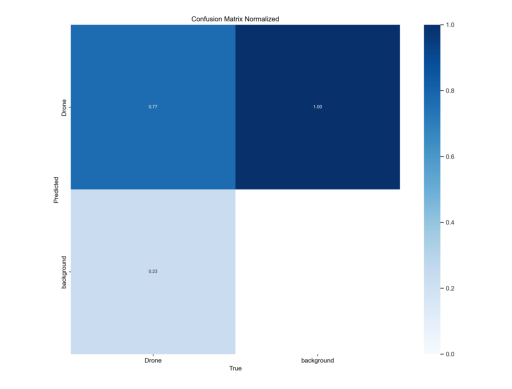

In [ ]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

# Open the image using the updated path
image_path = r'C:\Users\PC\Desktop\IAT360ComputerVision\runs\detect\train332\confusion_matrix_normalized.png'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
model.train(
    data=r"C:\Users\PC\Desktop\IAT360ComputerVision\config.yaml",  # Path to your dataset config
    epochs=50,                                         # Increased number of epochs
    patience=5,                                       # Increased patience for early stopping
    batch=30,                                          # Smaller batch size for better generalization
    lr0=0.0001,                                        # Higher initial learning rate
    imgsz=640,                                         # Keep image size                                        # Number of workers for data loading
    augment=True,                                             # Image size
    workers=12,                                       # Number of workers for data loading
    mosaic=True
)

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:\Users\PC\Desktop\IAT360ComputerVision\config.yaml, epochs=50, time=None, patience=5, batch=30, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=12, project=None, name=train333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

train: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train.cache... 4

train: WARNING  C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video15_487.JPEG: ignoring corrupt image/label: image file is truncated (5 bytes not processed)



val: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val.cache... 30 im


Plotting labels to runs\detect\train333\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to runs\detect\train333
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.87G      1.479     0.9304      1.254         32        640: 100%|██████████| 134/134 [01:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30       0.77      0.433       0.46      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.76G       1.58     0.9804      1.296         25        640: 100%|██████████| 134/134 [01:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30       0.76      0.467      0.455      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.76G      1.593      1.013      1.318         32        640: 100%|██████████| 134/134 [01:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.458      0.267      0.281     0.0871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.74G      1.596     0.9911      1.313         25        640: 100%|██████████| 134/134 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.452      0.433      0.418      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.74G      1.574     0.9744      1.309         39        640: 100%|██████████| 134/134 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.461      0.433      0.361      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.76G      1.564     0.9416      1.286         34        640: 100%|██████████| 134/134 [01:54<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.643      0.433       0.47      0.145
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



6 epochs completed in 0.212 hours.
Optimizer stripped from runs\detect\train333\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train333\weights\best.pt, 19.2MB

Validating runs\detect\train333\weights\best.pt...
Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         30         30      0.803       0.68      0.658      0.237
Speed: 1.1ms preprocess, 18.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs\detect\train333


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001193794AB70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val.cache... 30 im
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:17<0


                   all         30         30      0.772      0.676      0.655      0.231
Speed: 8.6ms preprocess, 23.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\train3332


0.6761833731936976

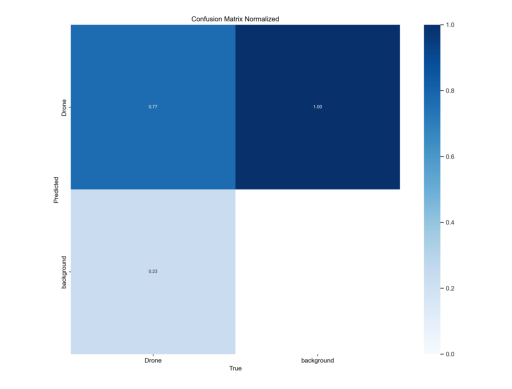

In [ ]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

# Open the image using the updated path
image_path = r'C:\Users\PC\Desktop\IAT360ComputerVision\runs\detect\train3332\confusion_matrix_normalized.png'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

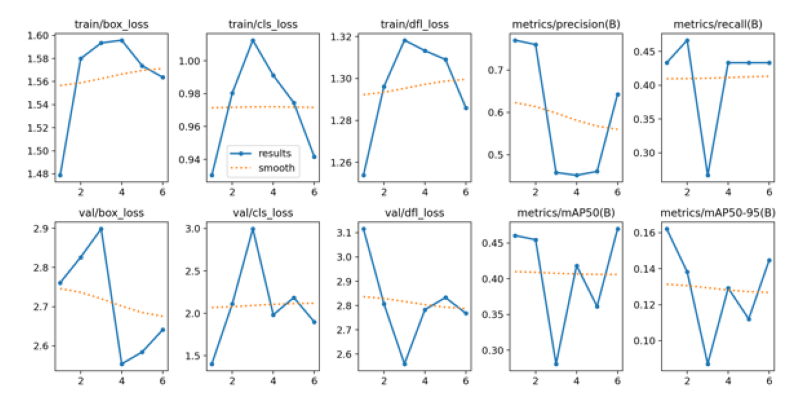

In [ ]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

# Open the image using the updated path
image_path = r'C:\Users\PC\Desktop\IAT360ComputerVision\/runs/detect/train333/results.png'
image = Image.open(image_path)

# Resize the image (optional, adjust as needed)
image = image.resize((600, image.size[1] * 600 // image.size[0]))  # Maintain aspect ratio

# Display the image with a larger figure size
plt.figure(figsize=(10, 10))  # Adjust the figure size here (width, height)
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
model.train(
    data=r"C:\Users\PC\Desktop\IAT360ComputerVision\config.yaml",  # Path to your dataset config
    epochs=50,                                         # Increased number of epochs
    patience=5,                                       # Increased patience for early stopping
    batch=30,                                          # Smaller batch size for better generalization
    lr0=0.0005,                                        # Higher initial learning rate
    imgsz=640,                                         # Keep image size                                        # Number of workers for data loading
    augment=True,                                             # Image size
    workers=12,                                       # Number of workers for data loading
    mosaic=True
)

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=C:\Users\PC\Desktop\IAT360ComputerVision\config.yaml, epochs=50, time=None, patience=5, batch=30, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=12, project=None, name=train3333, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

train: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\train.cache... 4

train: WARNING  C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\images\train\video15_487.JPEG: ignoring corrupt image/label: image file is truncated (5 bytes not processed)



val: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val.cache... 30 im


Plotting labels to runs\detect\train3333\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.00046875), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to runs\detect\train3333
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       7.8G      1.407     0.8574      1.217         32        640: 100%|██████████| 134/134 [07:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         30         30        0.5      0.533      0.378      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.77G      1.578      0.968      1.289         25        640: 100%|██████████| 134/134 [02:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.756        0.5      0.531      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.77G      1.582     0.9976      1.311         32        640: 100%|██████████| 134/134 [02:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<0

                   all         30         30      0.562      0.333      0.401      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.74G      1.596     0.9924      1.317         25        640: 100%|██████████| 134/134 [01:30<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.581        0.5      0.522      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.77G      1.576     0.9592      1.303         39        640: 100%|██████████| 134/134 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.853        0.6      0.578      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.74G      1.568     0.9467      1.286         34        640: 100%|██████████| 134/134 [01:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.836      0.567      0.693      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.76G      1.559     0.9339      1.291         29        640: 100%|██████████| 134/134 [01:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.627      0.567      0.577      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.74G      1.531     0.9134       1.28         32        640: 100%|██████████| 134/134 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.653      0.633      0.579      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.76G      1.548     0.9135      1.289         25        640: 100%|██████████| 134/134 [03:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.573        0.6      0.519      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.74G      1.534     0.8927      1.272         38        640: 100%|██████████| 134/134 [02:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.666      0.531      0.475      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.76G      1.522     0.8962      1.268         27        640: 100%|██████████| 134/134 [01:39<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0

                   all         30         30      0.723      0.533      0.535      0.189
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 6, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



11 epochs completed in 0.459 hours.
Optimizer stripped from runs\detect\train3333\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train3333\weights\best.pt, 19.2MB

Validating runs\detect\train3333\weights\best.pt...
Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0


                   all         30         30       0.82      0.733      0.782      0.299
Speed: 0.5ms preprocess, 17.0ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs\detect\train3333


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001195CAAF3E0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27  Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050, 8192MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning C:\Users\PC\Desktop\IAT360ComputerVision\Mydrive\Datasets\DRONE DATA\Final_data\labels\val.cache... 30 im
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:18<0


                   all         30         30      0.792      0.763      0.776      0.299
Speed: 9.6ms preprocess, 23.2ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs\detect\train33332


0.7633073871915202

In [ ]:
import shutil
import os

# Specify the path to the folder you want to delete
folder_path = r"C:\Users\PC\Desktop\IAT360ComputerVision\/runs/detect/train33333"

# Check if the folder exists
if os.path.exists(folder_path):
    # Delete the folder and all its contents
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted successfully.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'C:\Users\PC\Desktop\IAT360ComputerVision\/runs/detect/train33333' has been deleted successfully.


In [ ]:
model = YOLO(r'C:\Users\PC\Desktop\IAT360ComputerVision\/runs/detect/train3333/weights/best.pt')

In [ ]:
results = model(r"\Users\PC\Desktop\IAT360ComputerVision\/drone camera flying video #drone #photography #trending #shorts - AKASH VIDEOGRAPHY (720p, h264).mp4", save=True, show=True,stream=True)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/247) C:\Users\PC\Desktop\IAT360ComputerVision\drone camera flying video #drone #photography #trending #shorts - AKASH VIDEOGRAPHY (720p, h264).mp4: 640x384 1 Drone, 102.5ms
video 1/1 (frame 2/247) C:\Users\PC\Desktop\IAT360ComputerVision\drone camera flying video #drone #photography #trending #shorts - AKASH VIDEOGRAPHY (720p, h264).mp4: 640x384 1 Drone, 22.9ms
video 1/1 (frame 3/247) C:\Users\PC\Desktop\IAT360ComputerVision\drone came

In [ ]:
results = model("C:/Users/PC/Desktop/IAT360ComputerVision/Testing Model Images/aaron-burden-0fA3gVTGwjQ-unsplash.jpg", save=True)


image 1/1 C:\Users\PC\Desktop\IAT360ComputerVision\Testing Model Images\aaron-burden-0fA3gVTGwjQ-unsplash.jpg: 480x640 1 Drone, 99.2ms
Speed: 0.0ms preprocess, 99.2ms inference, 8.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\detect\predict5


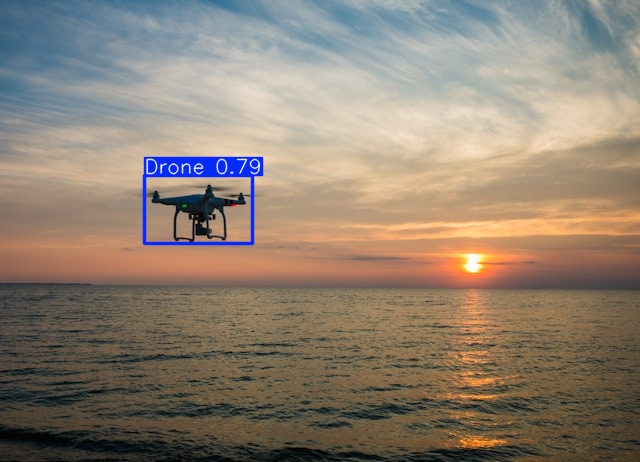

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict4/aaron-burden-0fA3gVTGwjQ-unsplash.jpg")

In [ ]:
results = model("C:/Users/PC/Desktop/IAT360ComputerVision/Testing Model Images/drone-2676000_640.jpg", save=True)


image 1/1 C:\Users\PC\Desktop\IAT360ComputerVision\Testing Model Images\drone-2676000_640.jpg: 448x640 2 Drones, 260.4ms
Speed: 5.1ms preprocess, 260.4ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict5


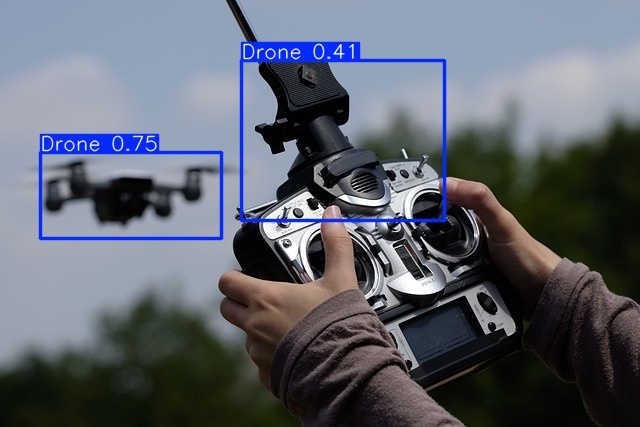

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict4/drone-2676000_640.jpg")

In [ ]:
results = model("C:/Users/PC/Desktop/IAT360ComputerVision/Testing Model Images/drone-3453361_640.jpg", save=True)


image 1/1 C:\Users\PC\Desktop\IAT360ComputerVision\Testing Model Images\drone-3453361_640.jpg: 416x640 2 Drones, 306.9ms
Speed: 4.7ms preprocess, 306.9ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict5


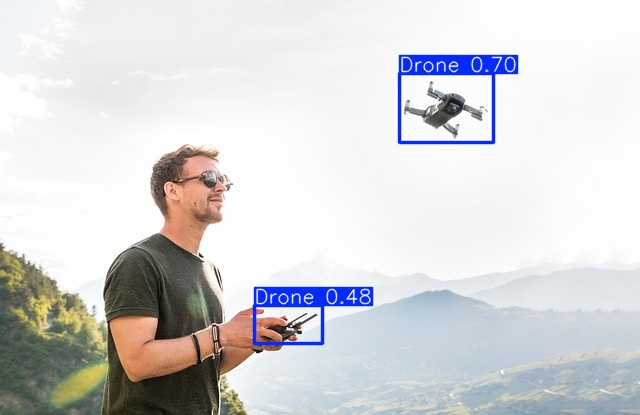

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict4/drone-3453361_640.jpg")

In [ ]:
results = model("C:/Users/PC/Desktop/IAT360ComputerVision/Testing Model Images/flight-3407008_640.jpg", save=True)


image 1/1 C:\Users\PC\Desktop\IAT360ComputerVision\Testing Model Images\flight-3407008_640.jpg: 448x640 1 Drone, 299.8ms
Speed: 5.2ms preprocess, 299.8ms inference, 4.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict4


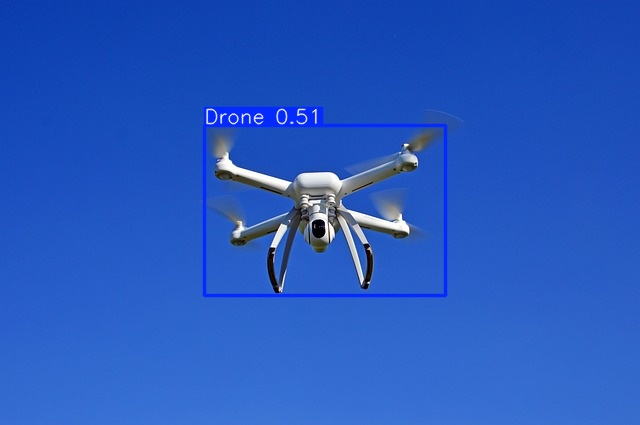

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict4/flight-3407008_640.jpg")

In [ ]:
results = model("C:/Users/PC/Desktop/IAT360ComputerVision/Testing Model Images/ginkgo-3758236_640.jpg", save=True)


image 1/1 C:\Users\PC\Desktop\IAT360ComputerVision\Testing Model Images\ginkgo-3758236_640.jpg: 448x640 1 Drone, 250.3ms
Speed: 5.3ms preprocess, 250.3ms inference, 4.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict4


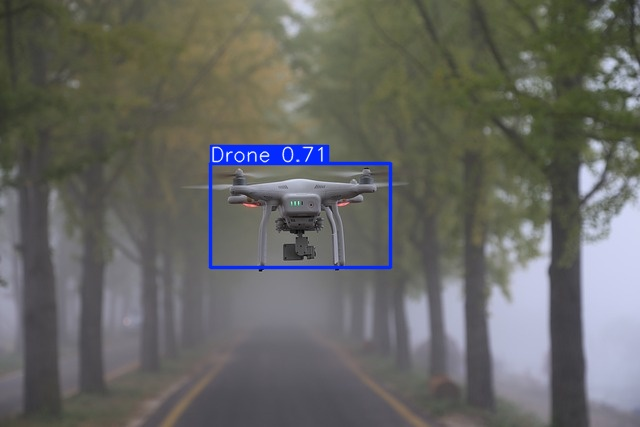

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict4/ginkgo-3758236_640.jpg")

In [ ]:
results = model("C:/Users/PC/Desktop/IAT360ComputerVision/Testing Model Images/nathan-dumlao-k2GX9kNhXyQ-unsplash.jpg", save=True)


image 1/1 C:\Users\PC\Desktop\IAT360ComputerVision\Testing Model Images\nathan-dumlao-k2GX9kNhXyQ-unsplash.jpg: 640x448 1 Drone, 346.5ms
Speed: 7.4ms preprocess, 346.5ms inference, 17.9ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs\detect\predict5


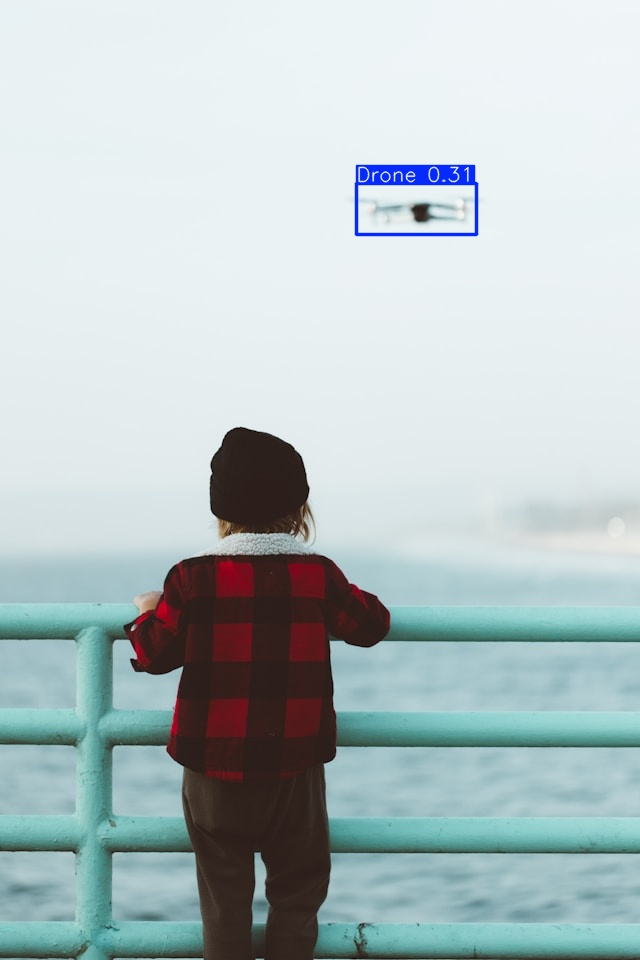

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict4/nathan-dumlao-k2GX9kNhXyQ-unsplash.jpg")

In [ ]:
results = model("C:/Users/PC/Desktop/IAT360ComputerVision/Testing Model Images/peter-fogden-2xRTb9V8jhc-unsplash.jpg", save=True)


image 1/1 C:\Users\PC\Desktop\IAT360ComputerVision\Testing Model Images\peter-fogden-2xRTb9V8jhc-unsplash.jpg: 448x640 2 Drones, 240.6ms
Speed: 5.3ms preprocess, 240.6ms inference, 15.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict5


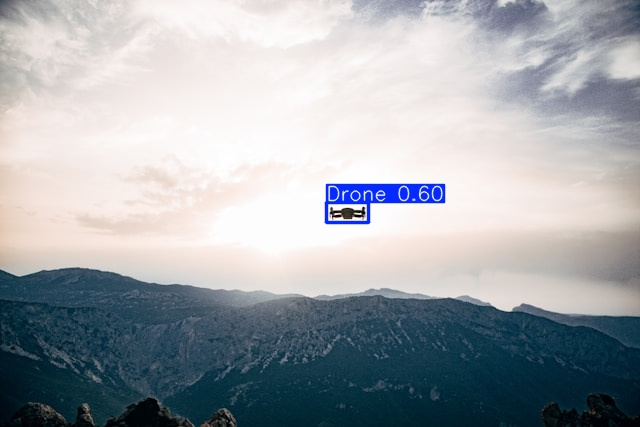

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict4/peter-fogden-2xRTb9V8jhc-unsplash.jpg")

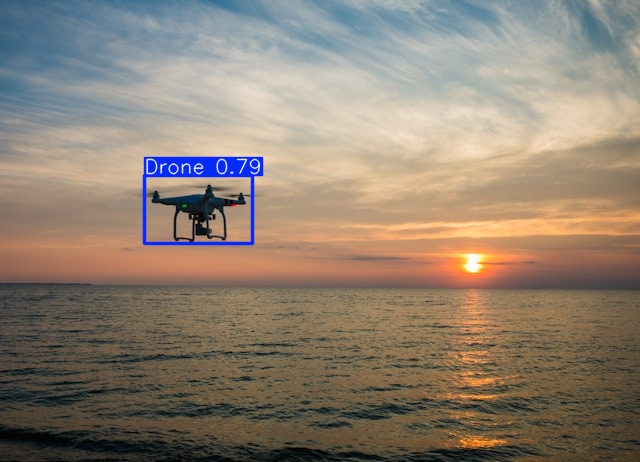

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict4/aaron-burden-0fA3gVTGwjQ-unsplash.jpg")

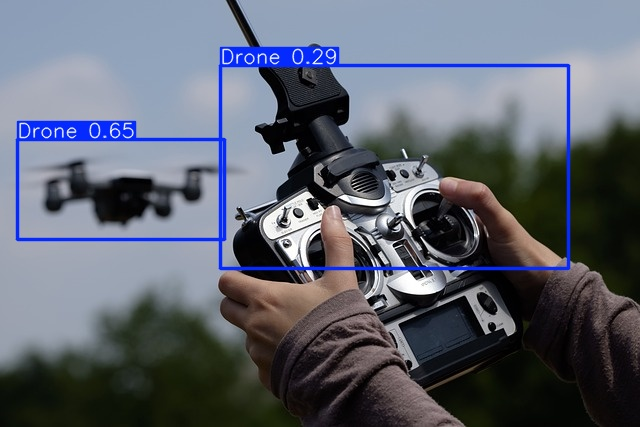

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict5/drone-2676000_640.jpg")

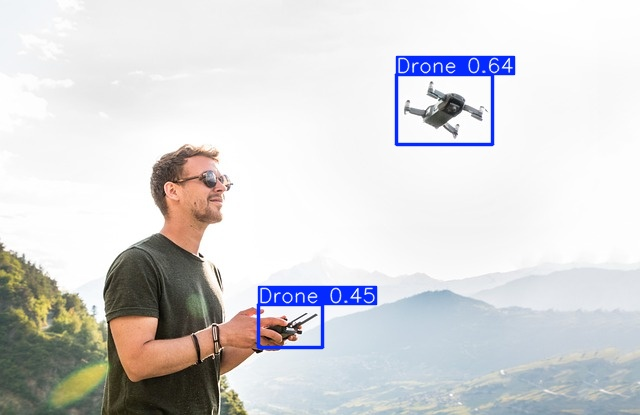

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict5/drone-3453361_640.jpg")

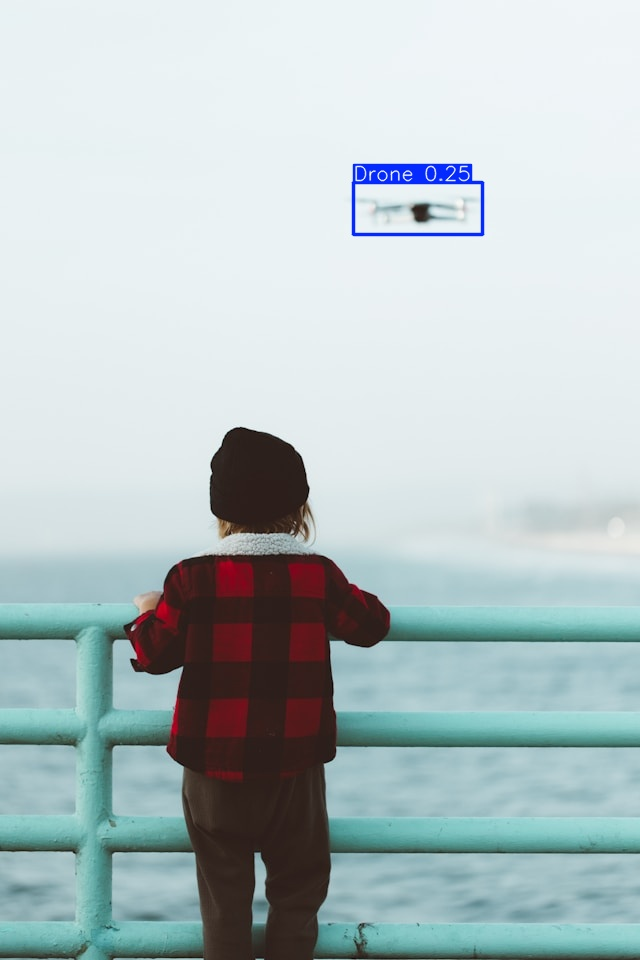

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict5/nathan-dumlao-k2GX9kNhXyQ-unsplash.jpg")

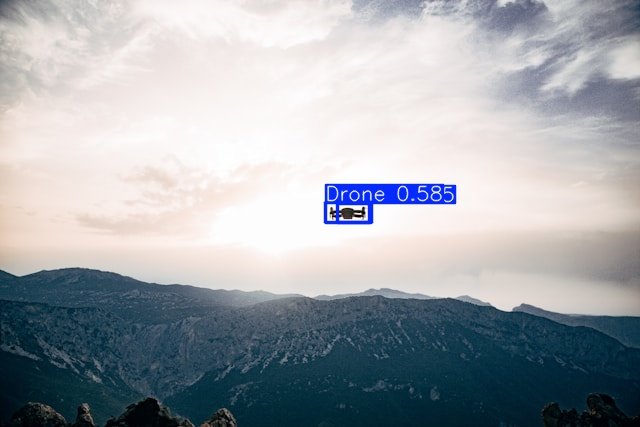

In [ ]:
%matplotlib inline
from PIL import Image

Image.open(r"/Users/PC/Desktop/IAT360ComputerVision/runs/detect/predict5/peter-fogden-2xRTb9V8jhc-unsplash.jpg")

In [ ]:
import shutil
import os

# Path to the folder you want to delete
folder_path = "C:/path/to/your/folder"

# Check if the folder exists, then delete
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"The folder at {folder_path} has been deleted.")
else:
    print(f"The folder at {folder_path} does not exist.")